# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [94]:
import numpy as np

#test
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


from types import SimpleNamespace
# Import your own code
from  inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**--**
We set up the possible allocoations of X1A and x2a, these can be from 0 to 1.

**--**
We then set up two empty arrays for posible x1 and x2 paretooptimal allocations.

**--**
Lastly we loop trhough all possible allocations of X1A and x2A, if the allocation creates at least the same utility for both A and B we then add that allocation to our 
paretooptimal allocations


In [67]:
N = 75
w1A = 0.8
w2A = 0.3


x1A = np.linspace(0,1,N+1)
x2A = np.linspace(0,1,N+1)

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B((1-x1),(1-x2)) >= model.utility_B(1-w1A,1-w2A):
            x1possible.append(x1)
            x2possible.append(x2)


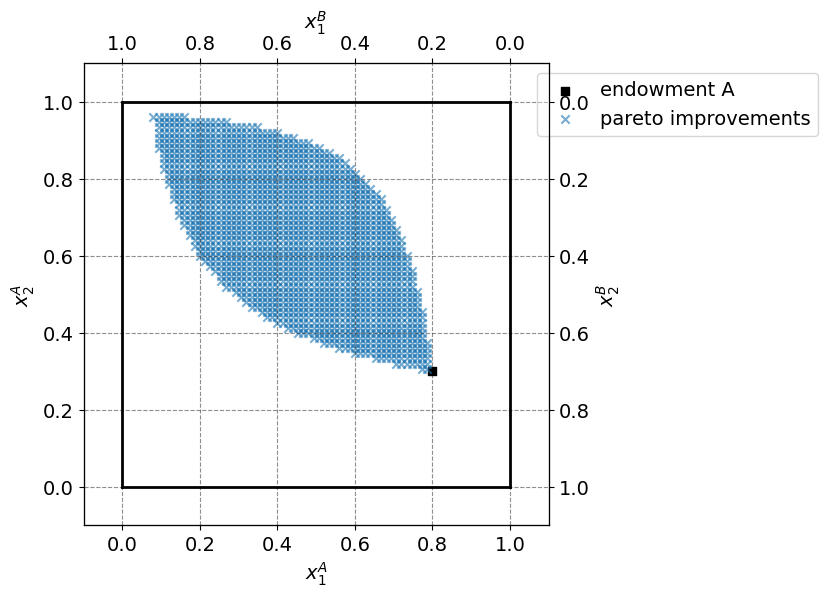

In [68]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment A')
ax_A.scatter(x1possible,x2possible, marker='x',alpha=0.6, label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));



# Question 2

Explain your code and procedure

In [89]:

p1 = []

for x in range(N+1):
    new = 0.5+2*x/N
    p1.append(new)

print(p1[74:76])
# code

[2.4733333333333336, 2.5]


[(0.06666666666666649, -0.2666666666666666)]


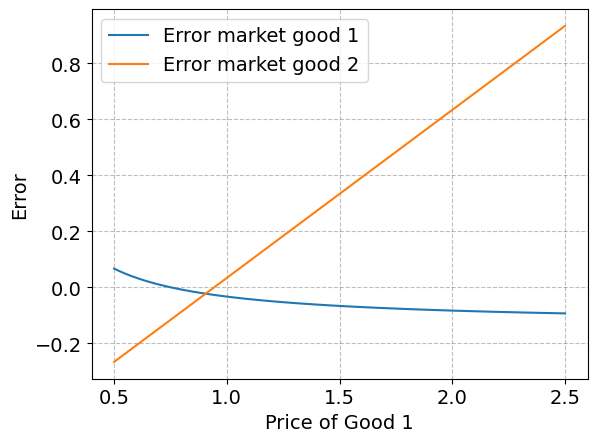

In [92]:

error = []

for x in p1:
    append_e = model.check_market_clearing(x)
    error.append(append_e)

print(error[0:1])



errors_1 = [e[0] for e in error]
errors_2 = [e[1] for e in error]



plt.plot(p1, errors_1, label='Error market good 1')
plt.plot(p1, errors_2, label='Error market good 2')
plt.xlabel('Price of Good 1')
plt.ylabel('Error')
plt.legend()
plt.show()



# Question 3

Explain your code and procedure

In [93]:
model.market_clearing_price(2)


[autoreload of inauguralproject failed: Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\andre\anaconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Users\andre\anaconda3\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\Users\andre\Desktop\projects-2024-andy-og-birdy\inauguralproject\inauguralproject.py", line 66
    def market_clearing_

AttributeError: 'ExchangeEconomyClass' object has no attribute 'market_clearing_price'

ADD CONCISE CONLUSION.